#  KNN Classifier Project-This notebook demonstrates how to use the K-Nearest Neighbors algorithm for classification using Scikit-learn. 

# 1.Important libraries For Implement the Cnn Classiefier 

In [134]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

# 2.Load Dataset using Pandas Library 



In [176]:
df = pd.read_csv("dataset.csv")



In [177]:
df

,student_id,Iq,cgpa,performance
0,121,120,9,intelligent
1,122,100,8,intelligent
2,123,85,7,average
3,124,110,9,intelligent
4,125,95,8,intelligent
...,...,...,...,...
76,217,78,6,below average
77,218,85,8,intelligent
78,219,110,9,intelligent
79,220,112,9,intelligent


# 3. Information About Dataset

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   student_id   81 non-null     int64 
 1   Iq           81 non-null     int64 
 2   cgpa         81 non-null     int64 
 3   performance  81 non-null     object
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


# 4. Information about Columns 

In [138]:
df.columns

Index(['student_id', 'Iq ', 'cgpa', 'performance'], dtype='object')

# 5. Separate the x(input features/independent variable ) and y(output columns/dependent variable) columns 

In [139]:
y = df['performance']

In [140]:
X = df.iloc[:,0:3]

In [141]:
X

,student_id,Iq,cgpa
0,121,120,9
1,122,100,8
2,123,85,7
3,124,110,9
4,125,95,8
...,...,...,...
76,217,78,6
77,218,85,8
78,219,110,9
79,220,112,9


In [142]:
y

0        intelligent
1        intelligent
2            average
3        intelligent
4        intelligent
           ...      
76    below average 
77       intelligent
78       intelligent
79       intelligent
80       intelligent
Name: performance, Length: 81, dtype: object

# 6. Encoding of y(output variable) using Label Encoder

In [143]:
from sklearn.preprocessing import LabelEncoder

In [144]:
label = LabelEncoder()

In [145]:
k = label.fit_transform(y)

# 7.Using train_test_split class for separate the training and testing dataset


In [146]:
from sklearn.model_selection import train_test_split


In [147]:
X_train,X_test,y_train,y_test = train_test_split(X,k,test_size=0.2,random_state=42)

# 8.Import KNeighbour class for applying knn algorithm (Classification Problem)

In [148]:
from sklearn.neighbors import KNeighborsClassifier

In [149]:
knn = KNeighborsClassifier()

In [150]:
l=knn.fit(X_train,y_train)

In [151]:
l

KNeighborsClassifier()

In [152]:
y_pred = knn.predict(X_test)

In [153]:
y_pred

array([2, 4, 4, 2, 4, 4, 4, 0, 4, 2, 4, 0, 4, 4, 2, 4, 2])

In [154]:
y_test

array([2, 4, 4, 2, 4, 4, 4, 2, 4, 2, 4, 1, 4, 4, 2, 4, 2])

C:\Users\ARSHPREET KAUR\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


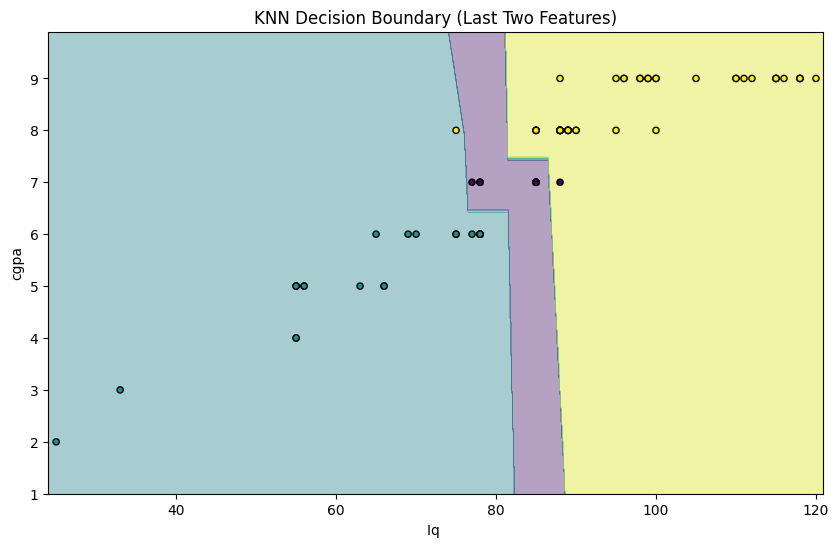

In [174]:
# Select last two features
X_plot = X.iloc[:, -2:]
knn.fit(X_plot, k)

# Set up mesh grid for decision boundary
h = 0.1
x_min, x_max = X_plot.iloc[:, 0].min() - 1, X_plot.iloc[:, 0].max() + 1
y_min, y_max = X_plot.iloc[:, 1].min() - 1, X_plot.iloc[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict on the grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and data points
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_plot.iloc[:, 0], X_plot.iloc[:, 1], c=k, s=20, edgecolor='k')
plt.xlabel(X_plot.columns[0])  # Automatically use column name
plt.ylabel(X_plot.columns[1])
plt.title('KNN Decision Boundary (Last Two Features)')
plt.show()

# 9. To Check accoracy we use Classification_report 

In [156]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         1
           2       1.00      0.83      0.91         6
           4       1.00      1.00      1.00        10

    accuracy                           0.88        17
   macro avg       0.50      0.46      0.48        17
weighted avg       0.94      0.88      0.91        17



C:\Users\ARSHPREET KAUR\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ARSHPREET KAUR\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ARSHPREET KAUR\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _w

# 10. Predict y(output variable for new input

In [170]:
new_input = [[34,6]]

In [171]:
f = knn.predict(new_input)

C:\Users\ARSHPREET KAUR\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [172]:
f

array([2])